# Preprocess

In this notebook we will preprocess the observations and simulations (UNSEEN).  

In [1]:
##Load pacakages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

## Observations

Let's download the observations. We do this using the [CABra](https://thecabradataset.shinyapps.io/CABra/) dataset and tools. See [Almagro et al. (2021)](https://doi.org/10.5194/hess-25-3105-2021). 
Using the shiny app you can explore the available observation stations. We select them and download them into this repository using the `wget` command

In [3]:
# !wget -O ../Data/Obidos_record_CABra.txt https://thecabradataset.shinyapps.io/CABra/_w_dc7ddebc/session/f594ed5c6efaa6a6431e2fcdc0b525ee/download/downloadData?w=dc7ddebc

In [4]:
# !wget -O ../Data/Xingu_record_CABra.txt https://thecabradataset.shinyapps.io/CABra/_w_d75db33b/session/9854b2d5ed51bb88a3fe58c9cae6392c/download/downloadData?w=d75db33b

In [5]:
# !wget -O ../Data/Tapajos_record_CABra.txt https://thecabradataset.shinyapps.io/CABra/_w_d75db33b/session/9854b2d5ed51bb88a3fe58c9cae6392c/download/downloadData?w=d75db33b

Here we load the downloaded datasets. We skip the first rows that provide additional information

In [6]:
Obidos_record = pd.read_csv('../Data/Obidos_record_CABra.txt', sep='\t',skiprows = 8)#, header=[0,1]) # Downloaded from BACra. Skip the header
# Obidos_record

Xingu_record = pd.read_csv('../Data/Xingu_record_CABra.txt', sep='\t',skiprows = 8)#, header=[0,1]) # Downloaded from BACra. Skip the header
# Xingu_record

Tapajos_record = pd.read_csv('../Data/Tapajos_record_CABra.txt', sep='\t',skiprows = 8)#, header=[0,1]) # Downloaded from BACra. Skip the header
# Tapajos_record

Then we need to do some pre-processing. First we name the columns so they can be used to create a datetime format. Then we remove the first row because that provides the units (m3/s) and not values. Third we create the datetime format and set it as index. Finally, we set the streamflow value type to float.  

In [7]:
Obidos_record.columns = ['Year', 'Month', 'Day', 'Streamflow', 'Quality']
Obidos_record = Obidos_record[1:]
date = pd.to_datetime(Obidos_record[['Year', 'Month', 'Day']])
Obidos_record.index = date
Obidos_record['Streamflow'] = Obidos_record['Streamflow'].astype(float)
Obidos_record

Xingu_record.columns = ['Year', 'Month', 'Day', 'Streamflow', 'Quality']
Xingu_record = Xingu_record[1:]
Xingu_record.index = date #same date as Obidos
Xingu_record['Streamflow'] = Xingu_record['Streamflow'].astype(float)
Xingu_record

Tapajos_record.columns = ['Year', 'Month', 'Day', 'Streamflow', 'Quality']
Tapajos_record = Tapajos_record[1:]
Tapajos_record.index = date #same date as Obidos
Tapajos_record['Streamflow'] = Tapajos_record['Streamflow'].astype(float)
Tapajos_record

Year   Month     Day  Streamflow      Quality
1980-10-01   1980      10       1   94579.891            2
1980-10-02   1980      10       2   94057.414            2
1980-10-03   1980      10       3   93189.023            2
1980-10-04   1980      10       4   92669.445            2
1980-10-05   1980      10       5   91805.898            2
...           ...     ...     ...         ...          ...
2010-09-26   2010       9      26   97208.531            2
2010-09-27   2010       9      27   95978.469            2
2010-09-28   2010       9      28   94405.609            2
2010-09-29   2010       9      29   92323.664            2
2010-09-30   2010       9      30   90259.180            2

[10957 rows x 5 columns]

Year   Month     Day  Streamflow      Quality
1980-10-01   1980      10       1     995.854            2
1980-10-02   1980      10       2    1011.401            2
1980-10-03   1980      10       3    1011.401            2
1980-10-04   1980      10       4    1027.081            2
1980-10-05   1980      10       5    1027.081            2
...           ...     ...     ...         ...          ...
2010-09-26   2010       9      26     896.103            2
2010-09-27   2010       9      27     881.573            2
2010-09-28   2010       9      28     881.573            2
2010-09-29   2010       9      29     867.188            2
2010-09-30   2010       9      30     852.945            2

[10957 rows x 5 columns]

Year   Month     Day  Streamflow      Quality
1980-10-01   1980      10       1    2653.697            2
1980-10-02   1980      10       2    2626.756            2
1980-10-03   1980      10       3    2599.999            2
1980-10-04   1980      10       4    2560.203            2
1980-10-05   1980      10       5    2599.999            2
...           ...     ...     ...         ...          ...
2010-09-26   2010       9      26    2367.308            2
2010-09-27   2010       9      27    2305.231            2
2010-09-28   2010       9      28    2244.249            2
2010-09-29   2010       9      29    2196.246            2
2010-09-30   2010       9      30    2172.502            2

[10957 rows x 5 columns]

In [8]:
Obidos_record_monthly = Obidos_record['Streamflow'].resample('M').mean()
Obidos_record_monthly = Obidos_record_monthly.to_xarray()
Obidos_record_annual = Obidos_record_monthly.groupby("index.year").max(dim="index")

Xingu_record_monthly = Xingu_record['Streamflow'].resample('M').mean()
Xingu_record_monthly = Xingu_record_monthly.to_xarray()
Xingu_record_annual = Xingu_record_monthly.groupby("index.year").max(dim="index")

Tapajos_record_monthly = Tapajos_record['Streamflow'].resample('M').mean()
Tapajos_record_monthly = Tapajos_record_monthly.to_xarray()
Tapajos_record_annual = Tapajos_record_monthly.groupby("index.year").max(dim="index")

We want observations representative of streamflow at the mouth of the Amazon. Obidos is the observation station closest to the outlet. The rivers Xingu and Tapajos still join the Amazon river downstream of Obidos. We therefore pool Obidos, Xingu and Tapajos together to represent total streamflow at the river mouth. We sum the monthly streamflow values:

In [9]:
Observations_pooled_monthly = Obidos_record_monthly + Xingu_record_monthly + Tapajos_record_monthly
Observations_pooled_annual = Observations_pooled_monthly.groupby("index.year").max(dim="index")

Let's store these annual maxima streamflow values. We remove the values for the year 1980 because the series starts in October 1980 and the annual maximum flood peak (somewhere in March-May) was not recorded.  

In [10]:
Obidos_record_annual_df = Obidos_record_annual.to_dataframe()
Obidos_record_annual_df[1:].to_csv('../Data/Obidos_CABra_record_annual_df.csv')

Xingu_record_annual_df = Xingu_record_annual.to_dataframe()
Xingu_record_annual_df[1:].to_csv('../Data/Xingu_CABra_record_annual_df.csv')

Tapajos_record_annual_df = Tapajos_record_annual.to_dataframe()
Tapajos_record_annual_df[1:].to_csv('../Data/Tapajos_CABra_record_annual_df.csv')

Observations_pooled_annual_df = Observations_pooled_annual.to_dataframe()
Observations_pooled_annual_df[1:].to_csv('../Data/Observations_pooled_annual_df.csv')

In [11]:
Observations_pooled_monthly.to_netcdf('../Data/Observations_pooled_monthly.nc')

### Show observed streamflow timeseries
Some functions to create the figure for publication:

In [12]:
plt.rcParams["font.family"] = "sans-serif" ##change font
plt.rcParams['font.size'] = 7  ## change font size
# plt.rcParams['svg.fonttype'] = 'none' ## so inkscape recognized texts in svg file
plt.rcParams['pdf.fonttype'] = 42 ## so illustrator can recognize text

<Figure size 226.772x170.079 with 0 Axes>

Text(0, 0.5, 'Discharge [1000 m3/s] ')

Text(0.5, 0, '')

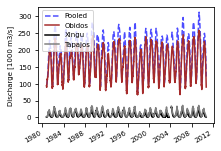

In [13]:
plt.figure(figsize=(80/25.4, 60/25.4))
(Observations_pooled_monthly/1000).plot(label = 'Pooled', color = 'blue', linestyle = '--', alpha=0.7)
(Obidos_record['Streamflow']/1000).plot(label = 'Obidos', color = 'brown')
(Xingu_record['Streamflow']/1000).plot(label = 'Xingu', color = 'black')
(Tapajos_record['Streamflow']/1000).plot(label = 'Tapajos', color = 'grey')
plt.legend()
plt.ylabel('Discharge [1000 m3/s] ')
plt.xlabel('')
# plt.savefig('../Graphs/Discharge_subcatchments.pdf',
#             bbox_inches='tight', 
#             dpi =300)
# plt.xlim('2008', '2010')

<Figure size 255.118x113.386 with 0 Axes>

Text(0, 0.5, 'Discharge [1000 m3/s] ')

Text(0.5, 0, '')

(456.0, 480.0)

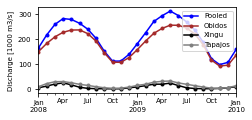

In [14]:
plt.figure(figsize=(90/25.4, 40/25.4))
(Observations_pooled_monthly.to_dataframe()['Streamflow']/1000).plot(label = 'Pooled', marker='o',
                                                markersize = 3,color = 'blue')
(Obidos_record_monthly.to_dataframe()['Streamflow']/1000).plot(label = 'Obidos',marker='o',
                                                markersize = 3, color = 'brown')
(Xingu_record_monthly.to_dataframe()['Streamflow']/1000).plot(label = 'Xingu',marker='o',
                                                markersize = 3, color = 'black')
(Tapajos_record_monthly.to_dataframe()['Streamflow']/1000).plot(label = 'Tapajos',marker='o',
                                                markersize = 3, color = 'grey')
plt.legend()
plt.ylabel('Discharge [1000 m3/s] ')
plt.xlabel('')
plt.xlim('2008', '2010')
# plt.savefig('../Graphs/Discharge_subcatchments_2009.pdf',
#             bbox_inches='tight', 
#             dpi =300)


### Longer Obidos record
Alternatively from CABra, a longer Obidos record can be downloaded from [Hybam](https://hybam.obs-mip.fr/). We use the dataset from CABra because it contains quality-controlled data over a homogenous period for all three stations. We plot the daily, monthly and annual maximum streamflow values from the longer Obidos record here just for reference.

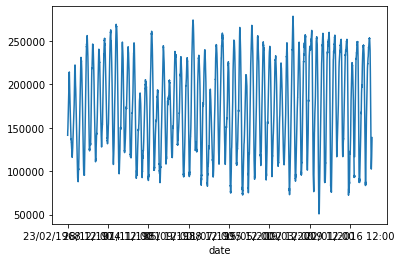

In [3]:
Amazon_observed = pd.read_csv(dirname + 'Obs/17050001_debits_Obidos.csv', skiprows = [1]) # Downloaded from Hybam. Skip the empty row after the header
Amazon_observed = Amazon_observed.set_index(['date'])
Amazon_observed['valeur'] = Amazon_observed['valeur'].astype(float)
Amazon_observed['valeur'].plot()

<xarray.DataArray 'valeur' (date: 624)>
array([159990.        , 153405.88235294, 159358.62068966, 173232.14285714,
       193017.24137931, 184639.28571429, 171041.37931034, 155737.93103448,
       145192.85714286, 138806.89655172, 133157.14285714, 135989.65517241,
       144501.61290323, 152991.78571429, 162802.58064516, 181400.        ,
       194876.77419355, 182585.33333333, 170936.4516129 , 152741.29032258,
       135668.        , 118927.09677419, 117201.33333333, 120705.48387097,
       137167.74193548, 153639.28571429, 173793.5483871 , 191043.33333333,
       204845.16129032, 201914.33333333, 194100.32258065, 177725.48387097,
       155331.66666667, 136926.4516129 , 124593.66666667, 123500.32258065,
       145848.38709677, 169921.42857143, 189409.67741935, 213793.33333333,
       223687.09677419, 225710.        , 217416.12903226, 198635.48387097,
       174693.33333333, 153025.80645161, 149393.33333333, 151693.5483871 ,
       154351.61290323, 178810.34482759, 198719.35483871, 209243.33333333,
       220783.87096774, 218426.66666667, 208100.        , 188761.29032258,
       169500.        , 150912.90322581, 140270.        , 146758.06451613,
       156967.74193548, 165350.        , 177645.16129032, 192883.33333333,
       211667.74193548, 215596.66666667, 209987.09677419, 196945.16129032,
       178903.33333333, 162919.35483871, 152030.        , 158661.29032258,
       171141.93548387, 190014.28571429, 205212.90322581, 219370.        ,
       229090.32258065, 225310.        , 216412.90322581, 200948.38709677,
       180566.66666667, 162448.38709677, 157523.33333333, 158809.67741935,
       169022.58064516, 187225.        , 203522.58064516, 222570.        ,
       233161.29032258, 233406.66666667, 224990.32258065, 209525.80645161,
       187910.        , 162722.58064516, 144666.66666667, 148509.67741935,
       161806.4516129 , 183182.75862069, 200280.64516129, 223366.66666667,
       236377.41935484, 233306.66666667, 222522.58064516, 196570.96774194,
       166903.33333333, 140332.25806452, 134112.        , 141894.83870968,
       153912.90322581, 159728.57142857, 174170.96774194, 195820.        ,
       216290.32258065, 216980.        , 207625.80645161, 184416.12903226,
       158160.        , 143174.19354839, 148663.33333333, 155793.5483871 ,
       174129.03225806, 176889.28571429, 191780.64516129, 204383.33333333,
       216806.4516129 , 213470.        , 203364.51612903, 182277.41935484,
       158106.66666667, 141816.12903226, 141893.33333333, 148538.70967742,
       164000.32258065, 170758.57142857, 182020.64516129, 201146.        ,
       215718.06451613, 214013.33333333, 198412.90322581, 168658.06451613,
       142146.66666667, 123460.64516129, 126044.        , 131620.        ,
       136812.58064516, 145015.17241379, 149498.70967742, 162299.66666667,
       168711.29032258, 170154.66666667, 162796.12903226, 144518.06451613,
       121857.33333333, 114687.74193548, 125565.33333333, 130495.16129032,
       141596.77419355, 153765.        , 166471.29032258, 180551.33333333,
       183706.12903226, 180671.66666667, 175157.41935484, 159779.67741935,
       135669.33333333, 117346.12903226, 118027.        , 126136.4516129 ,
       162183.87096774, 183653.57142857, 198848.38709677, 215070.        ,
       229500.        , 225903.33333333, 212058.06451613, 186519.35483871,
       160593.33333333, 137196.77419355, 135790.        , 147161.29032258,
       144690.32258065, 151403.92857143, 154640.96774194, 166844.66666667,
       173078.06451613, 171604.66666667, 158617.74193548, 133749.67741935,
       118146.33333333, 110291.93548387, 115783.33333333, 125234.19354839,
       155216.12903226, 169324.13793103, 188167.74193548, 203726.66666667,
       216577.41935484, 210246.66666667, 200974.19354839, 180803.22580645,
       158903.33333333, 138687.09677419, 138736.66666667, 144512.90322581,
       160816.12903226, 172792.85714286, 175183.87096774, 175723.33333333,
       187064.51612903, 186546.66666667, 178922.58064516, 16

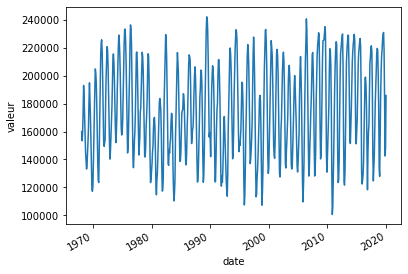

In [4]:
Amazon_observed.index = pd.to_datetime(Amazon_observed.index)
Amazon_observed_monthly = Amazon_observed['valeur'].resample('M').mean()
Amazon_observed_monthly = Amazon_observed_monthly.to_xarray()
Amazon_observed_monthly
Amazon_observed_monthly.plot()

<xarray.DataArray 'valeur' (date: 624)>
array([159990.        , 153405.88235294, 159358.62068966, 173232.14285714,
       193017.24137931, 184639.28571429, 171041.37931034, 155737.93103448,
       145192.85714286, 138806.89655172, 133157.14285714, 135989.65517241,
       144501.61290323, 152991.78571429, 162802.58064516, 181400.        ,
       194876.77419355, 182585.33333333, 170936.4516129 , 152741.29032258,
       135668.        , 118927.09677419, 117201.33333333, 120705.48387097,
       137167.74193548, 153639.28571429, 173793.5483871 , 191043.33333333,
       204845.16129032, 201914.33333333, 194100.32258065, 177725.48387097,
       155331.66666667, 136926.4516129 , 124593.66666667, 123500.32258065,
       145848.38709677, 169921.42857143, 189409.67741935, 213793.33333333,
       223687.09677419, 225710.        , 217416.12903226, 198635.48387097,
       174693.33333333, 153025.80645161, 149393.33333333, 151693.5483871 ,
       154351.61290323, 178810.34482759, 198719.35483871, 209243.33333333,
       220783.87096774, 218426.66666667, 208100.        , 188761.29032258,
       169500.        , 150912.90322581, 140270.        , 146758.06451613,
       156967.74193548, 165350.        , 177645.16129032, 192883.33333333,
       211667.74193548, 215596.66666667, 209987.09677419, 196945.16129032,
       178903.33333333, 162919.35483871, 152030.        , 158661.29032258,
       171141.93548387, 190014.28571429, 205212.90322581, 219370.        ,
       229090.32258065, 225310.        , 216412.90322581, 200948.38709677,
       180566.66666667, 162448.38709677, 157523.33333333, 158809.67741935,
       169022.58064516, 187225.        , 203522.58064516, 222570.        ,
       233161.29032258, 233406.66666667, 224990.32258065, 209525.80645161,
       187910.        , 162722.58064516, 144666.66666667, 148509.67741935,
       161806.4516129 , 183182.75862069, 200280.64516129, 223366.66666667,
       236377.41935484, 233306.66666667, 222522.58064516, 196570.96774194,
       166903.33333333, 140332.25806452, 134112.        , 141894.83870968,
       153912.90322581, 159728.57142857, 174170.96774194, 195820.        ,
       216290.32258065, 216980.        , 207625.80645161, 184416.12903226,
       158160.        , 143174.19354839, 148663.33333333, 155793.5483871 ,
       174129.03225806, 176889.28571429, 191780.64516129, 204383.33333333,
       216806.4516129 , 213470.        , 203364.51612903, 182277.41935484,
       158106.66666667, 141816.12903226, 141893.33333333, 148538.70967742,
       164000.32258065, 170758.57142857, 182020.64516129, 201146.        ,
       215718.06451613, 214013.33333333, 198412.90322581, 168658.06451613,
       142146.66666667, 123460.64516129, 126044.        , 131620.        ,
       136812.58064516, 145015.17241379, 149498.70967742, 162299.66666667,
       168711.29032258, 170154.66666667, 162796.12903226, 144518.06451613,
       121857.33333333, 114687.74193548, 125565.33333333, 130495.16129032,
       141596.77419355, 153765.        , 166471.29032258, 180551.33333333,
       183706.12903226, 180671.66666667, 175157.41935484, 159779.67741935,
       135669.33333333, 117346.12903226, 118027.        , 126136.4516129 ,
       162183.87096774, 183653.57142857, 198848.38709677, 215070.        ,
       229500.        , 225903.33333333, 212058.06451613, 186519.35483871,
       160593.33333333, 137196.77419355, 135790.        , 147161.29032258,
       144690.32258065, 151403.92857143, 154640.96774194, 166844.66666667,
       173078.06451613, 171604.66666667, 158617.74193548, 133749.67741935,
       118146.33333333, 110291.93548387, 115783.33333333, 125234.19354839,
       155216.12903226, 169324.13793103, 188167.74193548, 203726.66666667,
       216577.41935484, 210246.66666667, 200974.19354839, 180803.22580645,
       158903.33333333, 138687.09677419, 138736.66666667, 144512.90322581,
       160816.12903226, 172792.85714286, 175183.87096774, 175723.33333333,
       187064.51612903, 186546.66666667, 178922.58064516, 16

<xarray.DataArray 'valeur' (year: 52)>
array([193017.24137931, 194876.77419355, 204845.16129032, 225710.        ,
       220783.87096774, 215596.66666667, 229090.32258065, 233406.66666667,
       236377.41935484, 216980.        , 216806.4516129 , 215718.06451613,
       170154.66666667, 183706.12903226, 229500.        , 173078.06451613,
       216577.41935484, 187064.51612903, 214938.70967742, 206354.19354839,
       204007.41935484, 242161.29032258, 207087.41935484, 211513.33333333,
       170802.25806452, 219858.06451613, 232941.93548387, 195296.4516129 ,
       222306.4516129 , 227680.        , 185866.        , 233121.        ,
       225093.5483871 , 218854.83870968, 216822.66666667, 207393.33333333,
       200106.4516129 , 213724.51612903, 240700.64516129, 216587.33333333,
       230763.33333333, 235092.58064516, 219332.25806452, 224297.        ,
       229854.19354839, 228990.32258065, 229683.87096774, 226647.09677419,
       198985.51724138, 221421.33333333, 219578.33333333, 230964.51612903])
Coordinates:
  * year     (year) int64 1968 1969 1970 1971 1972 ... 2015 2016 2017 2018 2019

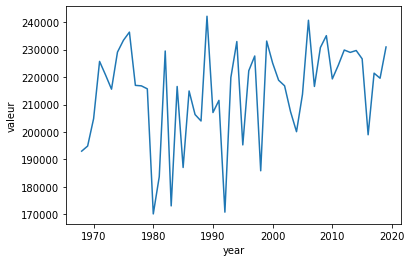

In [5]:
Obidos_record = Amazon_observed_monthly
Obidos_record
Obidos_record_annual = Obidos_record.groupby("date.year").max(dim="date")
Obidos_record_annual
Obidos_record_annual.plot()

## UNSEEN floods

Load the simulations (discharge_monthAvg_presentDay.nc) available at https://doi.org/10.5281/zenodo.4585400
 or download them in the *../Data*
directory by uncommenting and running the following line:

In [16]:
!wget -O ../Data/discharge_monthAvg_presentDay.nc https://zenodo.org/record/4585400/files/discharge_monthAvg_presentDay.nc

--2021-10-07 13:09:36--  https://zenodo.org/record/4585400/files/discharge_monthAvg_presentDay.nc
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247755472 (236M) [application/octet-stream]
Saving to: ‘../Data/discharge_monthAvg_presentDay.nc’

100%[======================================>] 247,755,472 40.7MB/s   in 5.8s   

2021-10-07 13:09:42 (40.7 MB/s) - ‘../Data/discharge_monthAvg_presentDay.nc’ saved [247755472/247755472]



In [17]:
Amazon_simulated = xr.open_dataset('../Data/discharge_monthAvg_presentDay.nc')
Amazon_simulated #to show

/home/tike/miniconda3/envs/exp/lib/python3.8/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/tike/miniconda3/envs/exp/lib/python3.8/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


<xarray.Dataset>
Dimensions:    (lat: 44, lon: 70, time: 24000)
Coordinates:
  * time       (time) object 0001-01-03 00:00:00 ... 2055-01-01 00:00:00
  * lat        (lat) float32 4.75 4.25 3.75 3.25 ... -15.25 -15.75 -16.25 -16.75
  * lon        (lon) float32 -79.75 -79.25 -78.75 ... -46.25 -45.75 -45.25
Data variables:
    discharge  (time, lat, lon) float32 ...

And select grid cells corresponding to (sub)catchment outlets

In [18]:
Amazon = Amazon_simulated['discharge'].sel(lon=-51.75,lat=-1.25)#.sel(lon=-50.25,lat=0.25)  ## Select the timeseries in the gridcell at the mouth of the river
Manaus = Amazon_simulated['discharge'].sel(lon=-59.75,lat=-3.25)  
Obidos = Amazon_simulated['discharge'].sel(lon=-55.75,lat=-2.25)  
Tapajos = Amazon_simulated['discharge'].sel(lon=-55.25,lat=-2.75)  
Xingu = Amazon_simulated['discharge'].sel(lon=-52.25,lat=-1.75)

Now we will select the annual monthly streamflow maxima. 

I couldnt assign 2000 years of data to the time dimension of xarray. Hence, I assigned a new coordinate with the years 0-1999.

In [19]:
Amazon = Amazon.assign_coords({'year': ('time', np.repeat(np.arange(2000),12))} )
Amazon
Amazon_annual = Amazon.groupby("year").max(dim="time")
Amazon_annual

Obidos = Obidos.assign_coords({'year': ('time', np.repeat(np.arange(2000),12))} )
Obidos
Obidos_annual = Obidos.groupby("year").max(dim="time")
Obidos_annual

<xarray.DataArray 'discharge' (time: 24000)>
array([185345.83, 211996.66, 241979.86, ..., 153125.78, 144078.7 , 152582.12],
      dtype=float32)
Coordinates:
  * time     (time) object 0001-01-03 00:00:00 ... 2055-01-01 00:00:00
    lat      float32 -1.25
    lon      float32 -51.75
    year     (time) int64 0 0 0 0 0 0 0 0 ... 1999 1999 1999 1999 1999 1999 1999
Attributes:
    standard_name:  discharge
    long_name:      discharge
    units:          m3s-1

<xarray.DataArray 'discharge' (year: 2000)>
array([287012.72, 301987.78, 358596.53, ..., 407820.25, 378064.  ,
       341684.56], dtype=float32)
Coordinates:
    lat      float32 -1.25
    lon      float32 -51.75
  * year     (year) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999

<xarray.DataArray 'discharge' (time: 24000)>
array([152280.95, 175300.23, 192076.03, ..., 126738.73, 118734.34, 128958.37],
      dtype=float32)
Coordinates:
  * time     (time) object 0001-01-03 00:00:00 ... 2055-01-01 00:00:00
    lat      float32 -2.25
    lon      float32 -55.75
    year     (time) int64 0 0 0 0 0 0 0 0 ... 1999 1999 1999 1999 1999 1999 1999
Attributes:
    standard_name:  discharge
    long_name:      discharge
    units:          m3s-1

<xarray.DataArray 'discharge' (year: 2000)>
array([237567.19, 241490.  , 267892.1 , ..., 337493.94, 296771.4 ,
       278421.6 ], dtype=float32)
Coordinates:
    lat      float32 -2.25
    lon      float32 -55.75
  * year     (year) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999

### Store the datasets to be used in R



In [20]:
Amazon_annual
Obidos_annual


<xarray.DataArray 'discharge' (year: 2000)>
array([287012.72, 301987.78, 358596.53, ..., 407820.25, 378064.  ,
       341684.56], dtype=float32)
Coordinates:
    lat      float32 -1.25
    lon      float32 -51.75
  * year     (year) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999

<xarray.DataArray 'discharge' (year: 2000)>
array([237567.19, 241490.  , 267892.1 , ..., 337493.94, 296771.4 ,
       278421.6 ], dtype=float32)
Coordinates:
    lat      float32 -2.25
    lon      float32 -55.75
  * year     (year) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999

In [21]:
Amazon_simulated_annual_df = Amazon_annual.drop(['lat','lon']).to_dataframe()
Amazon_simulated_annual_df.head()
Amazon_simulated_annual_df.to_csv('../Data/Amazon_annual_df.csv')

Obidos_simulated_annual_df = Obidos_annual.drop(['lat','lon']).to_dataframe()
Obidos_simulated_annual_df.head()
Obidos_simulated_annual_df.to_csv('../Data/Obidos_annual_df.csv')

discharge
year              
0     287012.71875
1     301987.78125
2     358596.53125
3     349216.28125
4     295950.96875

discharge
year               
0     237567.187500
1     241490.000000
2     267892.093750
3     286408.937500
4     234192.484375